In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\hpdem\OneDrive\Desktop\classification_project\titanic\titanic.csv")  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import pandas as pd
df = pd.read_csv("titanic.csv") 

# Show basic info
print(f"Rows: {len(df)}, Columns: {len(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values per column:")
print(df.isnull().sum())

Rows: 891, Columns: 12

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0         

In [7]:
# Drop 'Cabin' (too many missing values - 687/891)
df = df.drop('Cabin', axis=1)

# Fill 'Embarked' (only 2 missing rows) with the most common port ('S' = Southampton)
df['Embarked'] = df['Embarked'].fillna('S')

# Verify
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


In [8]:
# Fill missing 'Age' values with median age grouped by Pclass (since richer passengers were older)
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# Verify
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [9]:
# Drop columns that won't help prediction (PassengerId, Name, Ticket)
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# Final check
print("\nFinal columns:", df.columns.tolist())


Final columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [10]:
# Convert 'Sex' to binary (0=male, 1=female)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' (S, C, Q → 3 columns)
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)

print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


In [11]:
print("\nCleaned Data Summary:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


Cleaned Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB
None

Missing values:
 Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [12]:
X = df.drop('Survived', axis=1)  # Features (all columns except 'Survived')
y = df['Survived']               # Target (what we want to predict)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (891, 8)
Target shape: (891,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,    # 20% for testing
    random_state=42,  # Ensures reproducibility
    stratify=y        # Keeps class balance in splits
)

print("\nTraining set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (712, 8) (712,)
Test set: (179, 8) (179,)


In [14]:
print("\nClass balance in training set:", y_train.value_counts(normalize=True))
print("Class balance in test set:", y_test.value_counts(normalize=True))


Class balance in training set: Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
Class balance in test set: Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model (with default settings for now)
model = RandomForestClassifier(random_state=42)  

# Train it on the training data
model.fit(X_train, y_train)  

print("Model trained successfully!")

Model trained successfully!


In [16]:
train_accuracy = model.score(X_train, y_train)  
print(f"Training Accuracy: {train_accuracy:.2%}")  

Training Accuracy: 98.31%


In [17]:
test_accuracy = model.score(X_test, y_test)  
print(f"Test Accuracy: {test_accuracy:.2%}")  

Test Accuracy: 79.89%


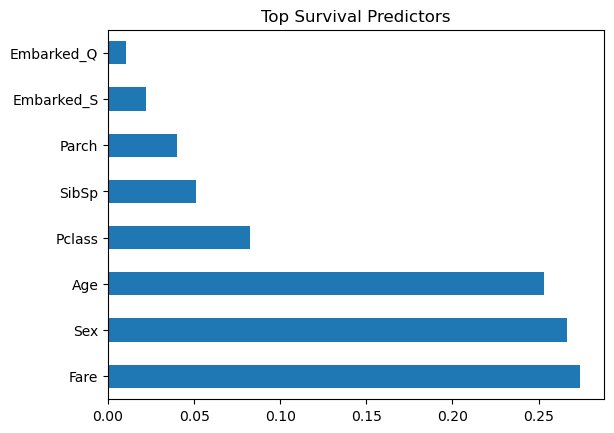

In [18]:
import pandas as pd

feature_importance = pd.Series(model.feature_importances_, index=X.columns)  
feature_importance.sort_values(ascending=False).plot(kind='barh')  
plt.title("Top Survival Predictors")  
plt.show()  

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters to test
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize and fit
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best CV Accuracy: 0.8287599724219442


In [20]:
# Family Size (Siblings + Parents/Children)
df['FamilySize'] = df['SibSp'] + df['Parch']

# Is Alone? (Binary)
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

# Fare per Person
df['FarePerPerson'] = df['Fare'] / (df['FamilySize'] + 1)

# Update X_train, X_test with new features
X_train = df.loc[X_train.index].drop('Survived', axis=1)
X_test = df.loc[X_test.index].drop('Survived', axis=1)

In [21]:
import joblib

# Train final model with best params
best_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Save to file
joblib.dump(best_model, 'titanic_model.pkl')

['titanic_model.pkl']

In [22]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)
model = joblib.load('titanic_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    df = pd.DataFrame([data])
    prediction = model.predict(df)[0]
    return jsonify({'survived': int(prediction)})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

c:\Users\hpdem\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [23]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Example: Save a dummy model (replace with your actual trained model)
model = RandomForestClassifier()
model.fit(X_train, y_train)  # Use your real training data
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']

In [24]:
import sklearn
print(sklearn.__version__)

1.2.2


In [25]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Re-train and save the model (or load and re-save if already trained)
model = RandomForestClassifier()  # Use your actual model parameters
model.fit(X_train, y_train)       # Use your training data
joblib.dump(model, 'titanic_model_new.pkl')  # New file name

['titanic_model_new.pkl']

In [26]:
import requests

sample_data = {
    "Pclass": 1, 
    "Sex": 0, 
    "Age": 35, 
    "SibSp": 1, 
    "Parch": 0, 
    "Fare": 50.0, 
    "Embarked_Q": 0, 
    "Embarked_S": 1
}

response = requests.post("http://127.0.0.1:5000/predict", json=sample_data)
print(response.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [27]:
print(model.feature_names_in_)

['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked_Q' 'Embarked_S'
 'FamilySize' 'IsAlone' 'FarePerPerson']


In [28]:
# After training in Jupyter
import pickle
with open('model_metadata.pkl', 'wb') as f:
    pickle.dump({
        'model': model,
        'feature_order': model.feature_names_in_.tolist()
    }, f)

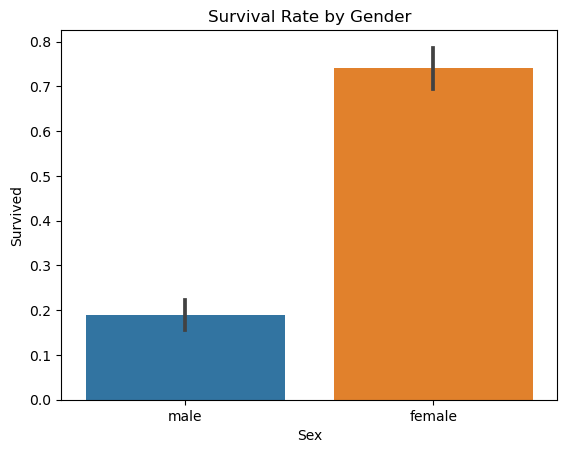

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()